In [7]:
import numpy as np

'''
指定k簇进行聚类
'''
class MyKmeans(object):
    
    def __init__(self, file, k):
        self.dataset = self.load_data(file)
        self.k = k
#         self.clusters = np.zeros()
    
    # 加载数据
    def load_data(self,file):
        dataset = np.loadtxt(file, delimiter='\t')
        return dataset
    
    # 计算欧氏距离
    def cal_dis(self, p1, p2):
        distance = np.sqrt(np.sum(p1 - p2)**2)
        return distance
    
    # 初始化质心
    def init_center(self, dataset, k):
        numSamples, dim = dataset.shape
        init_center = np.zeros((k, dim))
        for i in range(k):
            index = int(np.random.uniform(0, numSamples))
            init_center[i, :] = dataset[index, :]
        return init_center
    
    # kmeans聚类
    def kmeans(self):
        m, n = self.dataset.shape
#         print(m, n)
        init_centers = self.init_center(self.dataset, self.k)
        result_clusters = np.empty(m, dtype=np.int32)
        while True:
            d = np.square(np.repeat(self.dataset, self.k, axis=0).reshape(m, self.k, n) - init_centers)
            distance = np.sqrt(np.sum(d, axis=2))
            index_min = np.argmin(distance, axis=1)
            
            if(index_min == result_clusters).all():
                return result_clusters, init_centers
            
            result_clusters[:] = index_min
            for i in range(self.k):
                items = self.dataset[result_clusters == i]
                init_centers[i] = np.mean(items, axis=0)

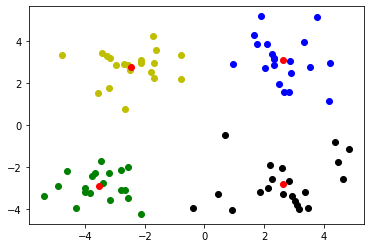

In [8]:
import matplotlib.pyplot as plt

myKmeans = MyKmeans('./test.txt', 4)

# for i in myKmeans.dataset:
#     plt.scatter(i[0], i[1])

result_clusters, init_centers = myKmeans.kmeans()

num = result_clusters.shape[0]
# print(num)

# print(result_clusters.shape)
for i in range(0, num):
    if result_clusters[i] == 0:
        plt.scatter(myKmeans.dataset[i][0], myKmeans.dataset[i][1], c='b')
    elif result_clusters[i] == 1:
        plt.scatter(myKmeans.dataset[i][0], myKmeans.dataset[i][1], c='g')
    elif result_clusters[i] == 2:
        plt.scatter(myKmeans.dataset[i][0], myKmeans.dataset[i][1], c='black')
    elif result_clusters[i] == 3:
        plt.scatter(myKmeans.dataset[i][0], myKmeans.dataset[i][1], c='y')
        

for i in init_centers:
    plt.scatter(i[0], i[1], c='r')

In [9]:
import numpy as np

In [10]:
points = np.random.randn(1000,2)

np.savetxt("./random_points.txt", points, fmt='%f',delimiter='\t')

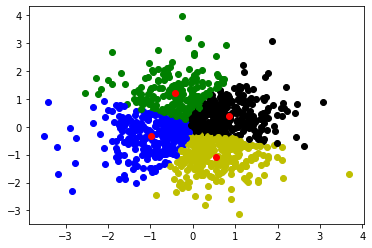

In [11]:
import matplotlib.pyplot as plt

myKmeans = MyKmeans('./random_points.txt', 4)

# for i in myKmeans.dataset:
#     plt.scatter(i[0], i[1])

result_clusters, init_centers = myKmeans.kmeans()

num = result_clusters.shape[0]
# print(num)

# print(result_clusters.shape)
for i in range(0, num):
    if result_clusters[i] == 0:
        plt.scatter(myKmeans.dataset[i][0], myKmeans.dataset[i][1], c='b')
    elif result_clusters[i] == 1:
        plt.scatter(myKmeans.dataset[i][0], myKmeans.dataset[i][1], c='g')
    elif result_clusters[i] == 2:
        plt.scatter(myKmeans.dataset[i][0], myKmeans.dataset[i][1], c='black')
    elif result_clusters[i] == 3:
        plt.scatter(myKmeans.dataset[i][0], myKmeans.dataset[i][1], c='y')
        

for i in init_centers:
    plt.scatter(i[0], i[1], c='r')

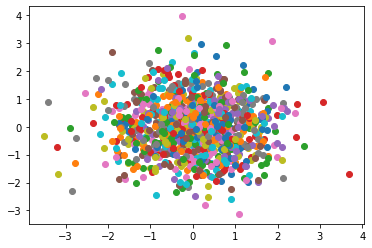

In [12]:
for i in myKmeans.dataset:
    plt.scatter(i[0], i[1])